# MGCAMB v3.0 Tests

In this notebook we test the new version of MGCAMB.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pil

In [2]:
sns.set()

In [87]:
def plot_test(gr, mg, qr, gr_m, mg_m, qr_m, title = None, output_file = None):
    
    fig = plt.figure(figsize = (12,7))
    
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,3)
    ax3 = plt.subplot(2,2,2)
    ax4 = plt.subplot(2,2,4)
    plt.subplots_adjust(hspace=0.05, wspace=0.2)
    
    # Cls
    ax1.semilogx(gr[:,0], gr[:,1], color = 'C2', linestyle = '-', label='CAMB')
    ax1.semilogx(mg[:,0], mg[:,1], color = 'C0', linestyle = '--', label=r'MGCAMB, $\mu,\gamma$')
    ax1.semilogx(qr[:,0], qr[:,1], color = 'C1', linestyle = ':', label='MGCAMB, $Q,R$')
    ax1.set_xlim(2,2500)
    ax1.legend(loc='upper left')
    ax1.set_xticklabels([])
    ax1.set_ylabel(r'$\ell(\ell + 1) C_{\ell}^{\rm TT} / 2 \pi$')
    ax1.grid(b=True, which='minor', color='white')

    
    # delta Cls
    ax2.semilogx(gr[:,0], (mg[:,1]-gr[:,1])/gr[:,1]*100, linestyle = '--')
    ax2.semilogx(gr[:,0], (qr[:,1]-gr[:,1])/gr[:,1]*100, linestyle = ':' )
    ax2.set_xlim(2,2500)
    ax2.set_ylim(-0.02,0.02)
    ax2.set_xlabel(r'$\ell$')
    ax2.set_ylabel(r'$ \Delta C_{\ell}^{\rm TT} / C_{\ell}^{\rm TT, GR} [\%]$ ')
    ax2.grid(b=True, which='minor', color='white')
    
    # P(k)
    ax3.loglog(gr_m[:,0], gr_m[:,1], color = 'C2')
    ax3.loglog(mg_m[:,0], mg_m[:,1], color = 'C0', linestyle = '--')
    ax3.loglog(qr_m[:,0], qr_m[:,1], color = 'C1', linestyle = ':')
    ax3.set_xlim(0.0001,2)
    ax3.set_ylabel(r'$P(k)$')
    ax3.grid(b=True, which='minor', color='white')
    ax3.set_xticklabels([])
    
    #delta P(k)
    ax4.semilogx(gr_m[:,0], (mg_m[:,1]-gr_m[:,1])/gr_m[:,1]*100, color = 'C0', linestyle = '--') 
    ax4.semilogx(gr_m[:,0], (qr_m[:,1]-gr_m[:,1])/gr_m[:,1]*100, color = 'C1', linestyle = ':' )
    ax4.set_xlim(0.0001,2)
    ax4.set_ylim(-0.02,0.02)
    ax4.set_xlabel(r'$k \, [h/{\rm Mpc}]$')
    ax4.set_ylabel(r'$ \Delta P(k) / P(k)_{\rm GR} [\%]$ ')
    ax4.grid(b=True, which='minor', color='white')
    
    if output_file is not None:
        pil.savefig(output_file, bbox_inches='tight')

    plt.show()

In [113]:
def plot_test_fR(eft, mg, eft_m, mg_m, title = None, output_file = None):
    
    fig = plt.figure(figsize = (12,7))
    
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,3)
    ax3 = plt.subplot(2,2,2)
    ax4 = plt.subplot(2,2,4)
    plt.subplots_adjust(hspace=0.05, wspace=0.2)
    
    # Cls
    ax1.semilogx(mg[:,0], mg[:,1], color = 'C0', linestyle = '--',  label='MGCAMB')
    ax1.semilogx(eft[:,0], eft[:,1], color = 'C1', linestyle = ':', label='EFTCAMB')
    ax1.set_xlim(2,2500)
    ax1.legend(loc='upper left')
    ax1.set_xticklabels([])
    ax1.set_ylabel(r'$\ell(\ell + 1) C_{\ell}^{\rm TT} / 2 \pi$')
    ax1.grid(b=True, which='minor', color='white')

    
    # delta Cls
    ax2.semilogx(mg[:,0], (mg[:,1]-eft[:,1])/eft[:,1]*100, linestyle = '-' )
    ax2.set_xlim(2,2500)
    ax2.set_ylim(-1,1)
    ax2.set_xlabel(r'$\ell$')
    ax2.set_ylabel(r'$ \Delta C_{\ell}^{\rm TT, MG} / C_{\ell}^{\rm TT, EFT} [\%]$ ')
    ax2.grid(b=True, which='minor', color='white')
    
    # P(k)
    ax3.loglog(mg_m[:,0],  mg_m[:,1], color = 'C0', linestyle = '--')
    ax3.loglog(eft_m[:,0], eft_m[:,1], color = 'C1', linestyle = ':')
    ax3.set_xlim(0.0001,2)
    ax3.set_ylabel(r'$P(k)$')
    ax3.grid(b=True, which='minor', color='white')
    ax3.set_xticklabels([])
    
    #delta P(k)
    ax4.semilogx(mg_m[:,0], (mg_m[:,1]-eft_m[:,1])/eft_m[:,1]*100, color = 'C0', linestyle = '-') 
    ax4.set_xlim(0.0001,2)
    ax4.set_ylim(-1,1)
    ax4.set_xlabel(r'$k \, [h/{\rm Mpc}]$')
    ax4.set_ylabel(r'$ \Delta P(k)_{\rm MG} / P(k)_{\rm EFT} [\%]$ ')
    ax4.grid(b=True, which='minor', color='white')
    
    if output_file is not None:
        pil.savefig(output_file, bbox_inches='tight')

    plt.show()

## 1. Massive Neutrinos 

We start by checking the GR limit of the two parametrizations implemented in MGCAMB, the $\mu,\gamma$ and the $Q,R$ parametrizations. 

### 1.1 $m_{\nu} = 0.060$ eV

In [88]:
gr   = np.loadtxt('./mgcamb_tests/test_GR_scalCls.dat')
mg   = np.loadtxt('./mgcamb_tests/test_GR_mugamma_scalCls.dat')
qr   = np.loadtxt('./mgcamb_tests/test_GR_QR_scalCls.dat')
gr_m = np.loadtxt('./mgcamb_tests/test_GR_matterpower.dat')
mg_m = np.loadtxt('./mgcamb_tests/test_GR_mugamma_matterpower.dat')
qr_m = np.loadtxt('./mgcamb_tests/test_GR_QR_matterpower.dat')

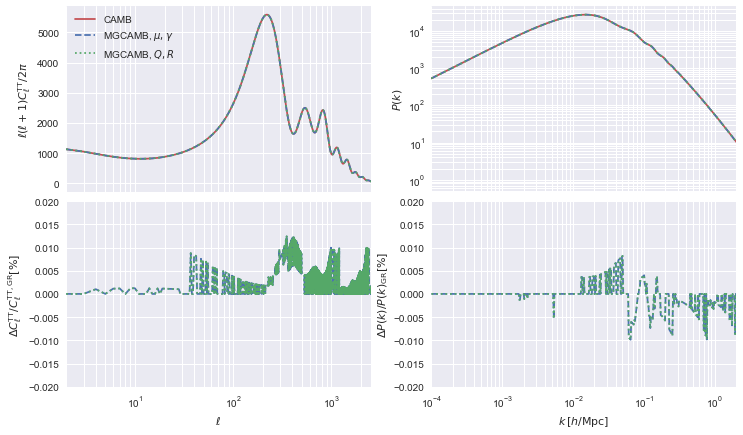

In [89]:
plot_test(gr, mg, qr, gr_m, mg_m, qr_m)

### 1.2. $m_{\nu} = 0.120 $ eV

In [90]:
gr = np.loadtxt('./mgcamb_tests/test_GR_2_scalCls.dat')
mg = np.loadtxt('./mgcamb_tests/test_GR_mugamma_2_scalCls.dat')
qr = np.loadtxt('./mgcamb_tests/test_GR_QR_2_scalCls.dat')

In [91]:
gr_m = np.loadtxt('./mgcamb_tests/test_GR_2_matterpower.dat')
mg_m = np.loadtxt('./mgcamb_tests/test_GR_mugamma_2_matterpower.dat')
qr_m = np.loadtxt('./mgcamb_tests/test_GR_QR_2_matterpower.dat')

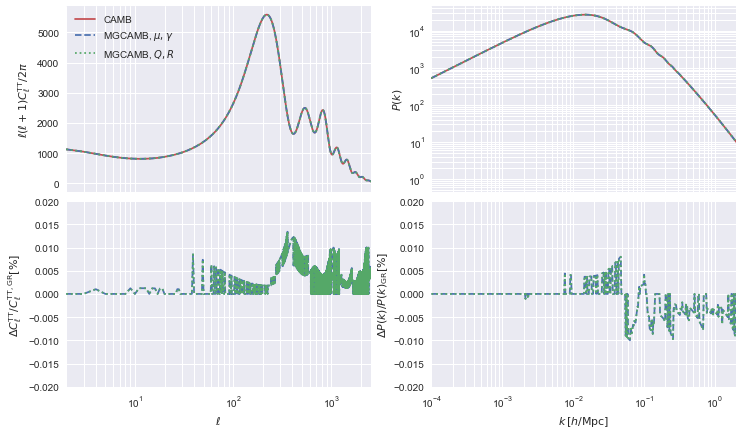

In [92]:
plot_test(gr, mg, qr, gr_m, mg_m, qr_m)

### 1.3. $m_{\nu} = 0.179$ eV

In [93]:
gr = np.loadtxt('./mgcamb_tests/test_GR_3_scalCls.dat')
mg = np.loadtxt('./mgcamb_tests/test_GR_mugamma_3_scalCls.dat')
qr = np.loadtxt('./mgcamb_tests/test_GR_QR_3_scalCls.dat')

In [94]:
gr_m = np.loadtxt('./mgcamb_tests/test_GR_3_matterpower.dat')
mg_m = np.loadtxt('./mgcamb_tests/test_GR_mugamma_3_matterpower.dat')
qr_m = np.loadtxt('./mgcamb_tests/test_GR_QR_3_matterpower.dat')

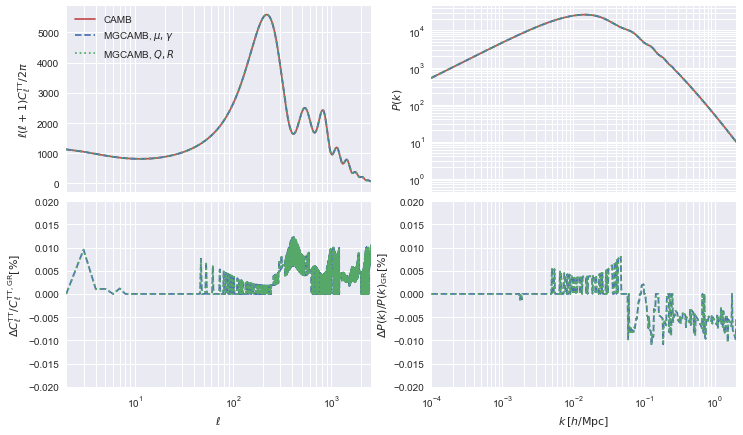

In [96]:
plot_test(gr, mg, qr, gr_m, mg_m, qr_m)

## 2. $f(R)$ tests

Here we check the differences of MGCAMB with EFTCAMB in the case of the $f(R)$ model. Remember that MGCAMB uses the quasi-static expressions for $f(R)$, while EFTCAMB, implements $f(R)$ exactly.

### 2.1. $B_0 = 10^{-6}$, $m_{\nu} = 0.06 eV$

In [114]:
mg  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_scalCls.dat')
eft = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_scalCls.dat')
mg_m  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_matterpower.dat')
eft_m = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_matterpower.dat')

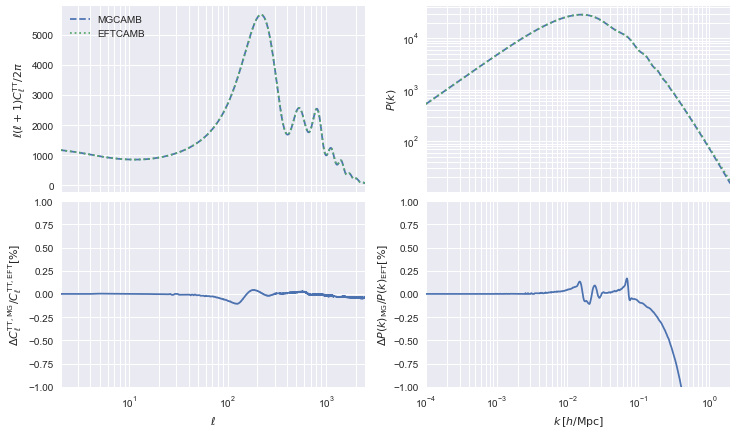

In [115]:
plot_test_fR(eft, mg, eft_m, mg_m)

### 2.2. $B_0 = 10^{-6}$, $m_{\nu} = 0.120 eV$

In [119]:
mg  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_2_scalCls.dat')
eft = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_2_scalCls.dat')
mg_m  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_2_matterpower.dat')
eft_m = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_2_matterpower.dat')

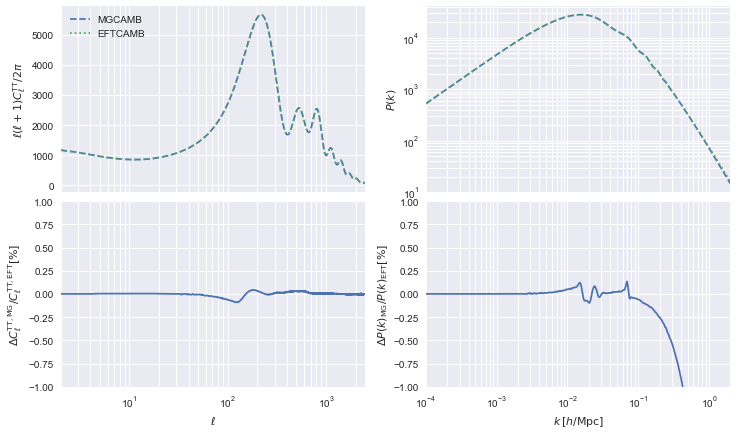

In [121]:
plot_test_fR(eft, mg, eft_m, mg_m)

### 2.3. $B_0 = 10^{-5}$, $m_{\nu} = 0.120 eV$

In [122]:
mg  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_3_scalCls.dat')
eft = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_3_scalCls.dat')
mg_m  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_3_matterpower.dat')
eft_m = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_3_matterpower.dat')

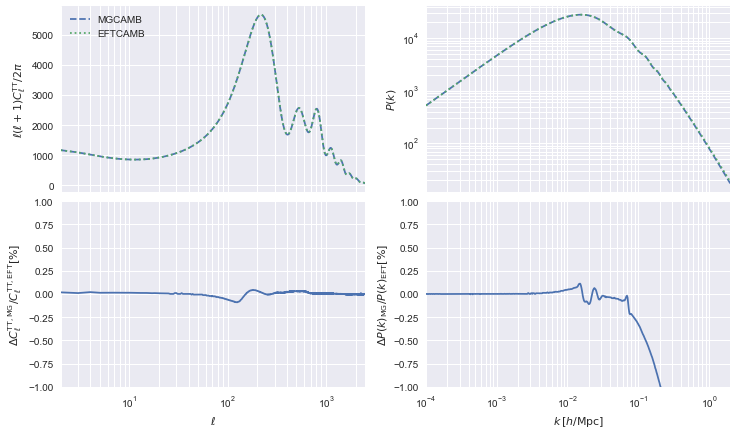

In [123]:
plot_test_fR(eft, mg, eft_m, mg_m)

### 2.4. $B_0 = 10^{-4}$, $m_{\nu} = 0.120 eV$

In [124]:
mg  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_4_scalCls.dat')
eft = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_4_scalCls.dat')
mg_m  = np.loadtxt('./mgcamb_tests/test_fR_MGCAMB_4_matterpower.dat')
eft_m = np.loadtxt('./mgcamb_tests/test_fR_EFTCAMB_4_matterpower.dat')

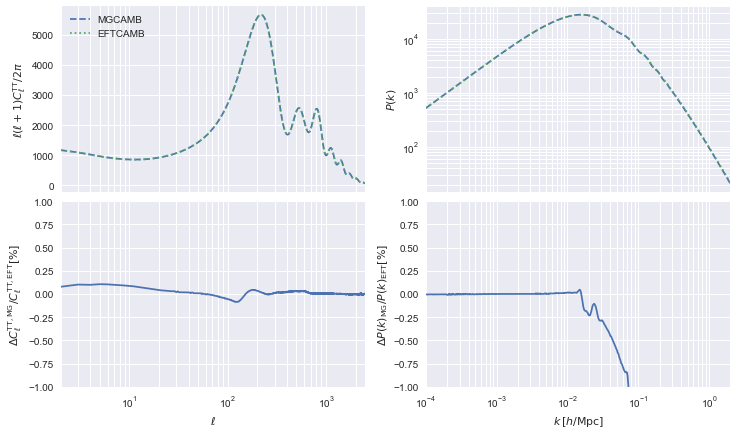

In [125]:
plot_test_fR(eft, mg, eft_m, mg_m)